## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(mouse_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate entries by mouse ID number that show up for Mouse ID and Timepoint.
duplicate_mouse = mouse_data[mouse_data[['Mouse ID', 'Timepoint']].duplicated()]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse = mouse_data[mouse_data['Mouse ID'] == 'g989' ].index
mouse_data.drop(duplicate_mouse, inplace=True)
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data["Mouse ID"].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stats_df = mouse_data.copy()
summary_stats_regimen = summary_stats_df[["Drug Regimen", "Tumor Volume (mm3)"]]
group_stats = summary_stats_regimen.groupby("Drug Regimen")


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
group_mean = group_stats.mean()
group_median = group_stats.median()
group_var = group_stats.var()
group_std = group_stats.std()
group_sem = group_stats.sem()
# Assemble the resulting series into a single summary dataframe.
group_stats_shown = pd.DataFrame({"Mean": group_mean["Tumor Volume (mm3)"],
                                 "Median": group_median["Tumor Volume (mm3)"],
                                 "VAR": group_var["Tumor Volume (mm3)"],
                                 "STD": group_std["Tumor Volume (mm3)"],
                                 "SEM": group_sem["Tumor Volume (mm3)"]
                                 })
group_stats_shown

,Mean,Median,VAR,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Count of Mice by Drug')

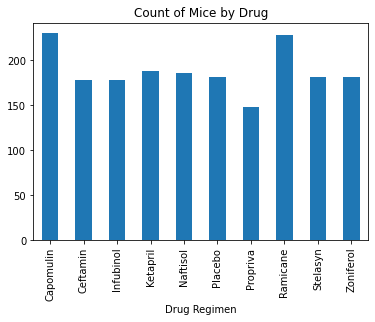

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
timepoints.plot.bar(x='Drug Regimen', y='Mouse ID')
plt.title("Count of Mice by Drug")

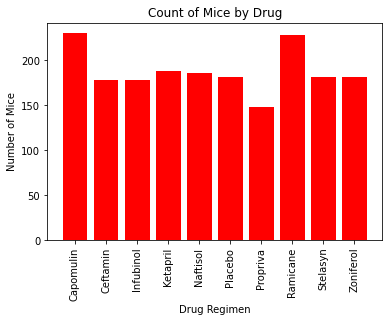

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
xaxis = np.arange(len(mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]))
yaxis = timepoints
plt.bar(xaxis, yaxis, align="center", color='r')
ticks = [value for value in xaxis]
plt.xticks(ticks, timepoints.index.values, rotation=90)
plt.title("Count of Mice by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#First I do a groupby by gender, taking only the Mouse ID
mouse_gender = mouse_data.groupby(["Sex"]).count()
mouse_gender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


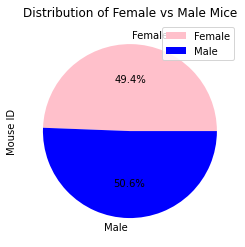

In [54]:
#Plot using pandas
gender_plot = mouse_gender.plot.pie(y='Mouse ID', title=("Distribution of Female vs Male Mice"), colors=["pink", "blue"], autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x15389e621c8>,
 [Text(-0.020992503472586185, -1.0997996703027118, 'Female'),
  Text(0.02099250347258632, 1.0997996703027118, 'Male')],
 [Text(-0.011450456439592464, -0.5998907292560246, '49.4%'),
  Text(0.011450456439592537, 0.5998907292560246, '50.6%')])

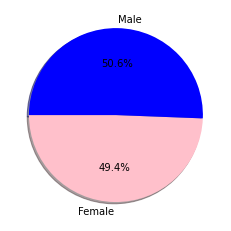

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [935, 958]
colors = ["pink", "blue"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
